In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = r'/content/drive/MyDrive/Dog-and-Cat-final/train'
validation_dir = r'/content/drive/MyDrive/Dog-and-Cat-final/valid'

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale=1.0/255,
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True)
test_gen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator=train_gen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=30,
        class_mode = 'categorical')

validation_generator = test_gen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=30,
        class_mode = 'categorical')

Found 3693 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import InceptionV3

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(800, activation="relu"))
model.add(layers.Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dropout (Dropout)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 800)               40960800  
                                                                 
 dense_1 (Dense)             (None, 2)                 1602      
                                                                 
Total params: 62,765,186
Trainable params: 62,730,754
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.00001),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      epochs=25,
      validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/25
124/124 [==============================] - 1629s 13s/step - loss: 0.4053 - acc: 0.8264 - val_loss: 0.0860 - val_acc: 0.9680
Epoch 2/25
124/124 [==============================] - 98s 784ms/step - loss: 0.2332 - acc: 0.9112 - val_loss: 0.0608 - val_acc: 0.9830
Epoch 3/25
124/124 [==============================] - 97s 783ms/step - loss: 0.1743 - acc: 0.9310 - val_loss: 0.0669 - val_acc: 0.9775
Epoch 4/25
124/124 [==============================] - 98s 786ms/step - loss: 0.1491 - acc: 0.9423 - val_loss: 0.0437 - val_acc: 0.9860
Epoch 5/25
124/124 [==============================] - 98s 789ms/step - loss: 0.1417 - acc: 0.9491 - val_loss: 0.0334 - val_acc: 0.9880
Epoch 6/25
124/124 [==============================] - 98s 784ms/step - loss: 0.1110 - acc: 0.9588 - val_loss: 0.0295 - val_acc: 0.9890
Epoch 7/25
124/124 [==============================] - 98s 785ms/step - loss: 0.0992 - acc: 0.9645 - val_loss: 0.0312 - val_acc: 0.9900
Epoch 8/25
124/124 [==============================] - 9

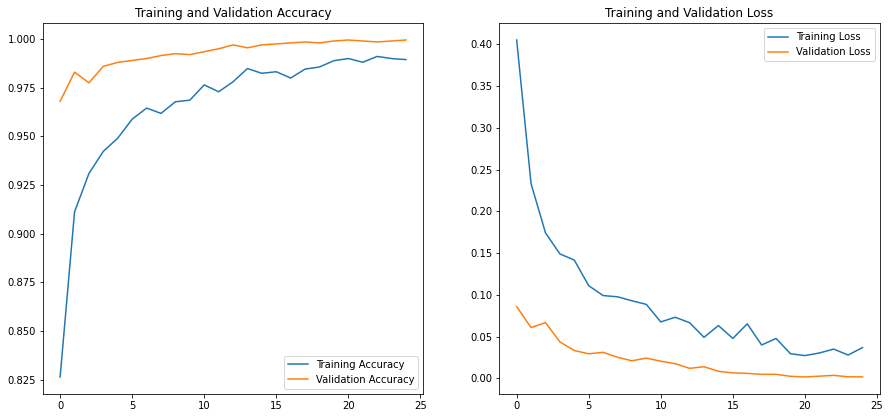

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/finalmodel.h5')

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/finalmodel.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import numpy as np

In [ ]:
import os
categories = ['cats','dogs']
categories

['cats', 'dogs']

cats


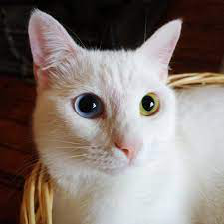

In [ ]:
img=image.load_img('/content/download.jpg',target_size=(224,224))
img
x=image.img_to_array(img)
x=x/255
images = np.vstack([[x]])
predict_x=model.predict(images) 
classes=np.argmax(predict_x,axis=1)
print(categories[classes[0]])
img

dogs


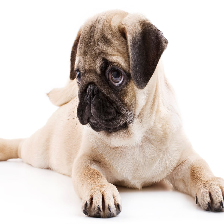

In [ ]:
img=image.load_img('/content/3408.jpg',target_size=(224,224))
img
x=image.img_to_array(img)
x=x/255
images = np.vstack([[x]])
predict_x=model.predict(images) 
classes=np.argmax(predict_x,axis=1)
print(categories[classes[0]])
img

cats


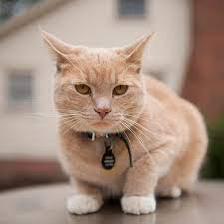

In [ ]:
img=image.load_img('/content/download (1).jpg',target_size=(224,224))
img
x=image.img_to_array(img)
x=x/255
images = np.vstack([[x]])
predict_x=model.predict(images) 
classes=np.argmax(predict_x,axis=1)
print(categories[classes[0]])
img

dogs


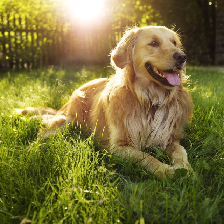

In [ ]:
img=image.load_img('/content/golden-retriever-royalty-free-image-506756303-1560962726.jpg',target_size=(224,224))
img
x=image.img_to_array(img)
x=x/255
images = np.vstack([[x]])
predict_x=model.predict(images) 
classes=np.argmax(predict_x,axis=1)
print(categories[classes[0]])
img